In [ ]:
!pip install -r requirements.txt

In [1]:
from requests import get
from pandas import DataFrame

# 1. Conectarse al enlace
URL_BASE='https://api.stackexchange.com/2.2/search?order=desc&sort=activity&intitle=perl&site=stackoverflow'

response = get(URL_BASE)
data = response.json()
df = DataFrame(data['items'])
df

,tags,owner,is_answered,view_count,accepted_answer_id,answer_count,score,last_activity_date,creation_date,question_id,content_license,link,title,closed_date,last_edit_date,closed_reason
0,"[perl, environment-variables]","{'reputation': 681, 'user_id': 1419500, 'user_...",True,708,53133879.0,3,2,1658865304,1541264814,53133604,CC BY-SA 4.0,https://stackoverflow.com/questions/53133604/c...,Can I detect if a Perl script is being run fro...,NaN,NaN,NaN
1,"[perl, installation, cpan]","{'reputation': 61, 'user_id': 9259319, 'user_t...",False,20,NaN,0,2,1658853939,1658853939,73127046,CC BY-SA 4.0,https://stackoverflow.com/questions/73127046/c...,Can&#39;t install some POE perl module in Stra...,NaN,NaN,NaN
2,"[html, perl, web, catalyst, template-toolkit]","{'reputation': 31, 'user_id': 19474564, 'user_...",False,26,NaN,0,1,1658850872,1658836798,73123017,NaN,https://stackoverflow.com/questions/73123017/h...,HTML filter on Template Toolkit. perl,1.658841e+09,1.658851e+09,Not suitable for this site
3,"[string, perl, text, utf-8, byte-order-mark]","{'reputation': 558, 'user_id': 1769925, 'user_...",True,9918,24390208.0,4,20,1658844299,1403622108,24390034,CC BY-SA 3.0,https://stackoverflow.com/questions/24390034/r...,Remove BOM from string with Perl,NaN,1.417023e+09,NaN
4,[perl],"{'reputation': 11, 'user_id': 8849723, 'user_t...",True,58,NaN,1,0,1658811579,1658774186,73113876,NaN,https://stackoverflow.com/questions/73113876/h...,How can I pass a variable from called perl scr...,1.658796e+09,1.658812e+09,Needs details or clarity
5,[perl],"{'reputation': 266, 'user_id': 5921900, 'user_...",True,58,73106726.0,1,2,1658811542,1658737586,73106099,CC BY-SA 4.0,https://stackoverflow.com/questions/73106099/p...,"Perl 5 : assignment of an anonymous arrayref, ...",NaN,1.658812e+09,NaN
6,[perl],"{'reputation': 337, 'user_id': 16649601, 'user...",True,60,NaN,2,0,1658808835,1658754769,73109834,CC BY-SA 4.0,https://stackoverflow.com/questions/73109834/p...,perl - return value from python,NaN,1.658809e+09,NaN
7,"[perl, makefile, pid]","{'reputation': 147, 'user_id': 17843701, 'user...",True,53,NaN,2,1,1658800331,1658769608,73113094,CC BY-SA 4.0,https://stackoverflow.com/questions/73113094/p...,Perl: How to get the PID of the command execut...,NaN,1.658800e+09,NaN
8,"[regex, perl, command-line]","{'reputation': 7042, 'user_id': 1211859, 'user...",True,91,NaN,1,0,1658788432,1642917386,70819512,CC BY-SA 4.0,https://stackoverflow.com/questions/70819512/i...,Is there a Perl regex metacharacter or a way t...,NaN,1.658788e+09,NaN
9,"[string, perl]","{'reputation': 9, 'user_id': 14504045, 'user_t...",True,54,NaN,3,0,1658773796,1658417348,73068937,CC BY-SA 4.0,https://stackoverflow.com/questions/73068937/r...,Removing a string from a file using Perl,NaN,1.658425e+09,NaN


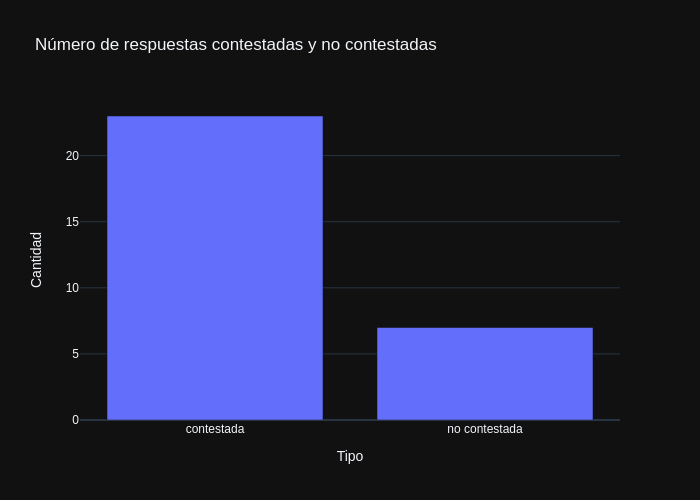

In [14]:
import plotly.express as px

# 2. Obtener el número de respuestas contestadas y no contestadas
answered = df.copy()['is_answered'].value_counts()
answered = answered.to_frame()
answered['names'] = answered.index.map({True:"contestada",False:"no contestada"})
fig = px.bar(answered, x='names', y='is_answered',title='Número de respuestas contestadas y no contestadas')
fig.update_layout(xaxis_title="Tipo", yaxis_title="Cantidad")
fig.show(renderer='png')

In [7]:
from pprint import pprint

# 3. Obtener la respuesta con menor número de vistas
print("Obtener la respuesta con menor número de vistas ! ->\n")
respuesta = df[df['view_count']==df['view_count'].min()].iloc[0].to_dict()
pprint(respuesta)

Obtener la respuesta con menor número de vistas ! ->

{'accepted_answer_id': nan,
 'answer_count': 0,
 'closed_date': nan,
 'closed_reason': nan,
 'content_license': 'CC BY-SA 4.0',
 'creation_date': 1658853939,
 'is_answered': False,
 'last_activity_date': 1658853939,
 'last_edit_date': nan,
 'link': 'https://stackoverflow.com/questions/73127046/cant-install-some-poe-perl-module-in-strawberry-perl',
 'owner': {'display_name': 'Bill de Haan',
           'link': 'https://stackoverflow.com/users/9259319/bill-de-haan',
           'profile_image': 'https://www.gravatar.com/avatar/9a2d5d1a7df68444d6bb9e130364e6bc?s=256&d=identicon&r=PG&f=1',
           'reputation': 61,
           'user_id': 9259319,
           'user_type': 'registered'},
 'question_id': 73127046,
 'score': 2,
 'tags': ['perl', 'installation', 'cpan'],
 'title': 'Can&#39;t install some POE perl module in Strawberry Perl',
 'view_count': 20}


In [22]:
# 4. Obtener la respuesta más vieja y más actual
print("Obtener la respuesta más vieja ! ->\n")
respuesta = df[df['creation_date']==df['creation_date'].min()].iloc[0].to_dict()
pprint(respuesta)

Obtener la respuesta más vieja ! ->

{'accepted_answer_id': 3952388.0,
 'answer_count': 10,
 'closed_date': 1603802220.0,
 'closed_reason': 'Opinion-based',
 'content_license': nan,
 'creation_date': 1287267403,
 'is_answered': True,
 'last_activity_date': 1658698488,
 'last_edit_date': 1658698488.0,
 'link': 'https://stackoverflow.com/questions/3951047/xml-vs-yaml-vs-json-for-data-feeds-in-perl-application',
 'owner': {'accept_rate': 89,
           'display_name': 'snoofkin',
           'link': 'https://stackoverflow.com/users/427306/snoofkin',
           'profile_image': 'https://www.gravatar.com/avatar/d44bf6beb829c965369f64334dcb6ee9?s=256&d=identicon&r=PG&f=1',
           'reputation': 8647,
           'user_id': 427306,
           'user_type': 'registered'},
 'question_id': 3951047,
 'score': 36,
 'tags': ['xml', 'perl', 'json', 'yaml'],
 'title': 'XML vs YAML vs JSON for data feeds in perl application?',
 'view_count': 28605}


In [23]:
# 4. Obtener la respuesta más vieja y más actual
print("Obtener la respuesta más actual ! \n")
respuesta = df[df['creation_date']==df['creation_date'].max()].iloc[0].to_dict()
pprint(respuesta)

Obtener la respuesta más actual ! 

{'accepted_answer_id': nan,
 'answer_count': 0,
 'closed_date': nan,
 'closed_reason': nan,
 'content_license': 'CC BY-SA 4.0',
 'creation_date': 1658853939,
 'is_answered': False,
 'last_activity_date': 1658853939,
 'last_edit_date': nan,
 'link': 'https://stackoverflow.com/questions/73127046/cant-install-some-poe-perl-module-in-strawberry-perl',
 'owner': {'display_name': 'Bill de Haan',
           'link': 'https://stackoverflow.com/users/9259319/bill-de-haan',
           'profile_image': 'https://www.gravatar.com/avatar/9a2d5d1a7df68444d6bb9e130364e6bc?s=256&d=identicon&r=PG&f=1',
           'reputation': 61,
           'user_id': 9259319,
           'user_type': 'registered'},
 'question_id': 73127046,
 'score': 2,
 'tags': ['perl', 'installation', 'cpan'],
 'title': 'Can&#39;t install some POE perl module in Strawberry Perl',
 'view_count': 20}


In [24]:
# 5. Obtener la respuesta del owner que tenga una mayor reputación
print("Obtener la respuesta del owner que tenga una mayor reputación ! \n")
respuesta = df[df['score']==df['score'].max()].iloc[0].to_dict()
pprint(respuesta)

Obtener la respuesta del owner que tenga una mayor reputación ! 

{'accepted_answer_id': 3952388.0,
 'answer_count': 10,
 'closed_date': 1603802220.0,
 'closed_reason': 'Opinion-based',
 'content_license': nan,
 'creation_date': 1287267403,
 'is_answered': True,
 'last_activity_date': 1658698488,
 'last_edit_date': 1658698488.0,
 'link': 'https://stackoverflow.com/questions/3951047/xml-vs-yaml-vs-json-for-data-feeds-in-perl-application',
 'owner': {'accept_rate': 89,
           'display_name': 'snoofkin',
           'link': 'https://stackoverflow.com/users/427306/snoofkin',
           'profile_image': 'https://www.gravatar.com/avatar/d44bf6beb829c965369f64334dcb6ee9?s=256&d=identicon&r=PG&f=1',
           'reputation': 8647,
           'user_id': 427306,
           'user_type': 'registered'},
 'question_id': 3951047,
 'score': 36,
 'tags': ['xml', 'perl', 'json', 'yaml'],
 'title': 'XML vs YAML vs JSON for data feeds in perl application?',
 'view_count': 28605}
